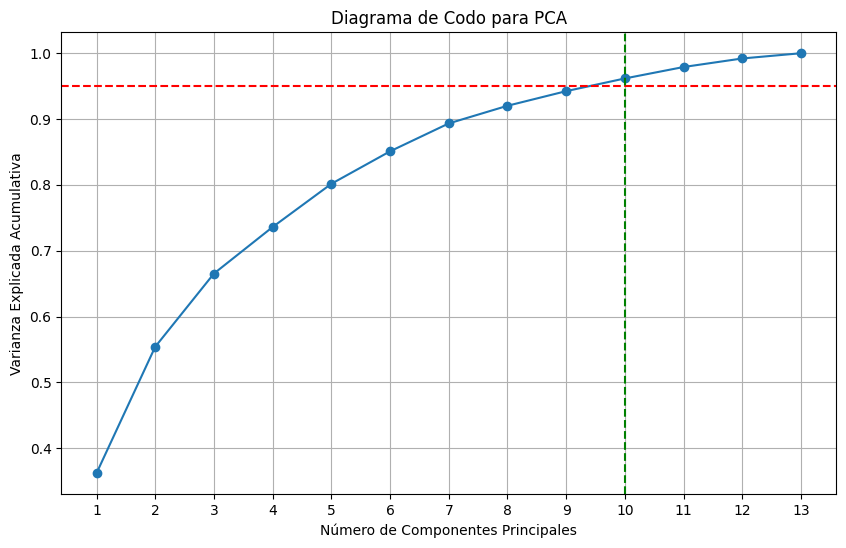

Pesos de cada componente principal:
       alcohol  malic_acid       ash  alcalinity_of_ash  magnesium  \
PC1   0.144329   -0.245188 -0.002051          -0.239320   0.141992   
PC2  -0.483652   -0.224931 -0.316069           0.010591  -0.299634   
PC3  -0.207383    0.089013  0.626224           0.612080   0.130757   
PC4  -0.017856    0.536890 -0.214176           0.060859  -0.351797   
PC5  -0.265664    0.035214 -0.143025           0.066103   0.727049   
PC6  -0.213539   -0.536814 -0.154475           0.100825  -0.038144   
PC7  -0.056396    0.420524 -0.149171          -0.286969   0.322883   
PC8  -0.396139   -0.065827  0.170260          -0.427970   0.156361   
PC9   0.508619   -0.075283 -0.307694           0.200449   0.271403   
PC10  0.211605   -0.309080 -0.027125           0.052799   0.067870   
PC11 -0.225917    0.076486 -0.498691           0.479314   0.071289   
PC12 -0.266286    0.121696 -0.049622          -0.055743   0.062220   
PC13  0.014970    0.025964 -0.141218           0.09168

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_wine
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Cargar el conjunto de datos Wine
wine = load_wine()
X = wine.data
y = wine.target

# Estandarizar los datos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Aplicar PCA
pca = PCA()
pca.fit(X_scaled)

# Calcular la varianza explicada acumulativa
explained_variance = np.cumsum(pca.explained_variance_ratio_)

# Crear el diagrama de codo
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(explained_variance) + 1), explained_variance, marker='o')
plt.title('Diagrama de Codo para PCA')
plt.xlabel('Número de Componentes Principales')
plt.ylabel('Varianza Explicada Acumulativa')
plt.xticks(range(1, len(explained_variance) + 1))
plt.grid()
plt.axhline(y=0.95, color='r', linestyle='--')  # Línea horizontal para el 95% de varianza
plt.axvline(x=np.argmax(explained_variance >= 0.95) + 1, color='g', linestyle='--')  # Línea vertical para el número óptimo
plt.show()

# Mostrar los pesos (cargados) de cada componente principal
components = pd.DataFrame(pca.components_, columns=wine.feature_names, index=[f'PC{i+1}' for i in range(len(pca.components_))])
print("Pesos de cada componente principal:")
print(components)
